In [1]:
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, f1_score, recall_score, precision_score
import time

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTENC

In [3]:
train = pd.read_csv("train_LZdllcl.csv")
train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


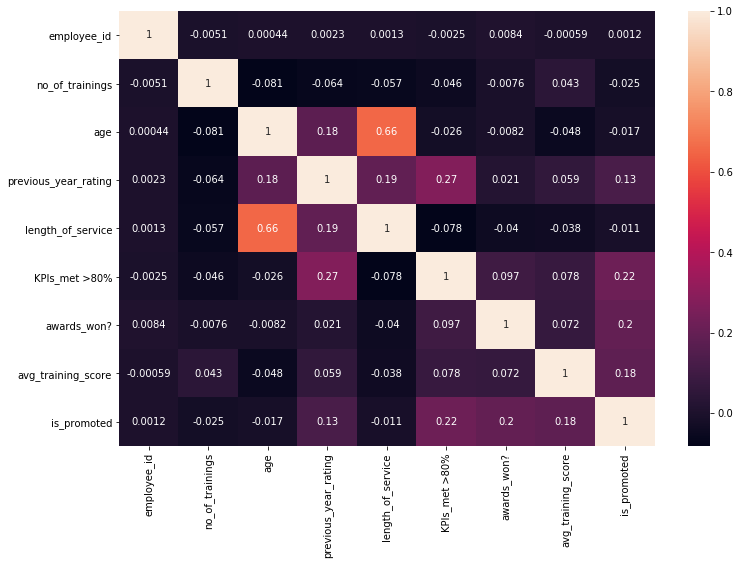

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, ax=ax)

In [64]:
train['no_of_trainings'].unique()

array([ 1,  2,  3,  4,  7,  5,  6,  8, 10,  9], dtype=int64)

In [65]:
train[train['no_of_trainings']>5]['is_promoted'].value_counts()

0    69
1     2
Name: is_promoted, dtype: int64

In [66]:
test = pd.read_csv("test_2umaH9m.csv")
test

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [68]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [69]:
# checking for different unique object values in test and train dataset
for col in train.columns:
    if str(train[col].dtype) == 'object':
        print("Column: "+col)
        print('Training Data Set Unique Values count: '+ str(len(train[col].unique())))
        print(train[col].unique())
        print('Testing Data Set Unique Values count: '+ str(len(train[col].unique())))
        print(test[col].unique())
        print('Different Values')
        print(set(train[col].unique()).difference(set(test[col].unique())))
        print('- - - - - - - - - -  - - - - - - - - - -  - --  --  -- - - - - - - - - - - - - - - - - - ')

Column: department
Training Data Set Unique Values count: 9
['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
Testing Data Set Unique Values count: 9
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
Different Values
set()
- - - - - - - - - -  - - - - - - - - - -  - --  --  -- - - - - - - - - - - - - - - - - - 
Column: region
Training Data Set Unique Values count: 34
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
Testing Data Set Unique Values count: 34
['region_26' 'region_4' 'region_13' 'region_2' 'region_29' 'region_7'
 'reg

In [70]:
# cheching target value count
train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [71]:
# checking target value distribution 
train['is_promoted'].value_counts()/train.shape[0]

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [72]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [73]:
test.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [74]:
train[train['previous_year_rating'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [75]:
# employees with 1 year of service has Null previous year rating which makes sense
train[train['previous_year_rating'].isna()]['length_of_service'].unique()

array([], dtype=int64)

#### replacing Null values with 0 in 'previous_year_rating' feature since only employees with less than 1 year of experience has Null value

In [76]:
train['previous_year_rating'].fillna(0, inplace=True)
test['previous_year_rating'].fillna(0, inplace=True)

In [77]:
train[train['education'].isna()]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted


In [78]:
train[(train['is_promoted']==1) & (train['length_of_service'] == 1.0)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
66,77981,Finance,region_22,Bachelor's,m,other,1,27,0.0,1,1,1,58,1
67,16502,Sales & Marketing,region_22,Bachelor's,m,sourcing,1,27,0.0,1,0,0,61,1
84,44575,Legal,region_7,Bachelor's,m,other,1,29,0.0,1,0,0,65,1
536,6731,R&D,region_29,Bachelor's,m,sourcing,1,30,5.0,1,0,0,96,1
542,63667,Procurement,region_26,Bachelor's,m,other,1,28,0.0,1,0,0,82,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54269,7364,Sales & Marketing,region_16,Bachelor's,m,other,1,27,4.0,1,1,0,49,1
54424,59303,Sales & Marketing,region_12,Bachelor's,f,other,1,27,0.0,1,0,0,67,1
54535,74499,R&D,region_22,Master's & above,m,other,2,28,0.0,1,1,0,83,1
54624,57131,Finance,region_2,Bachelor's,m,other,1,24,0.0,1,0,0,71,1


In [79]:
train['education'].unique()

array(["Master's & above", "Bachelor's", 'UNKNOWN', 'Below Secondary'],
      dtype=object)

In [80]:
train.groupby('department')['education'].unique().reset_index()

,department,education
0,Analytics,"[Bachelor's, Master's & above, UNKNOWN]"
1,Finance,"[Bachelor's, Master's & above, Below Secondary..."
2,HR,"[Bachelor's, Master's & above, Below Secondary..."
3,Legal,"[Bachelor's, Master's & above, Below Secondary..."
4,Operations,"[Bachelor's, Master's & above, UNKNOWN, Below ..."
5,Procurement,"[Bachelor's, Master's & above, Below Secondary..."
6,R&D,"[Master's & above, Bachelor's, UNKNOWN]"
7,Sales & Marketing,"[Master's & above, Bachelor's, UNKNOWN]"
8,Technology,"[Bachelor's, UNKNOWN, Master's & above, Below ..."


In [81]:
train[train['education'].isna()]['department'].unique()

array([], dtype=object)

#### its hard to guess the missing education details of individuals. Also, replacing Null values with Most frequent value doesn't make sense here since different department has different qualificatioons level. So, lets create a new category, namely, 'UNKNOWN'

In [82]:
train['education'].fillna('UNKNOWN', inplace=True)
test['education'].fillna('UNKNOWN', inplace=True)

In [83]:
train.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [84]:
test.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [85]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [87]:
set(train['age'].unique()).difference(set(test['age'].unique()))

set()

In [88]:
# let's combine both the dataset for feature engineering

combined_data = pd.concat([train, test])
combined_data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,0.0,1,0,0,70,NaN


In [89]:
# converting age to categorical value
combined_data['age'] = combined_data['age'].astype('str')
combined_data['age']

0        35
1        30
2        34
3        39
4        45
         ..
23485    24
23486    31
23487    26
23488    27
23489    40
Name: age, Length: 78298, dtype: object

### One Hot Encoding categorical features

In [90]:
categorical_features = [col for col in combined_data.columns if type(combined_data[col].iloc[0]) == str]
categorical_features

['department', 'region', 'education', 'gender', 'recruitment_channel', 'age']

In [91]:
categorical_features_encoded = pd.get_dummies(combined_data[categorical_features], drop_first=True)
categorical_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   department_Finance            78298 non-null  uint8
 1   department_HR                 78298 non-null  uint8
 2   department_Legal              78298 non-null  uint8
 3   department_Operations         78298 non-null  uint8
 4   department_Procurement        78298 non-null  uint8
 5   department_R&D                78298 non-null  uint8
 6   department_Sales & Marketing  78298 non-null  uint8
 7   department_Technology         78298 non-null  uint8
 8   region_region_10              78298 non-null  uint8
 9   region_region_11              78298 non-null  uint8
 10  region_region_12              78298 non-null  uint8
 11  region_region_13              78298 non-null  uint8
 12  region_region_14              78298 non-null  uint8
 13  region_region_15              7

In [92]:
df_encoded = combined_data.drop(labels=categorical_features, axis=1)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   no_of_trainings       78298 non-null  int64  
 2   previous_year_rating  78298 non-null  float64
 3   length_of_service     78298 non-null  int64  
 4   KPIs_met >80%         78298 non-null  int64  
 5   awards_won?           78298 non-null  int64  
 6   avg_training_score    78298 non-null  int64  
 7   is_promoted           54808 non-null  float64
dtypes: float64(2), int64(6)
memory usage: 5.4 MB


In [93]:
for col in categorical_features_encoded.columns:
    df_encoded[col] = categorical_features_encoded[col]
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 95 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   no_of_trainings               78298 non-null  int64  
 2   previous_year_rating          78298 non-null  float64
 3   length_of_service             78298 non-null  int64  
 4   KPIs_met >80%                 78298 non-null  int64  
 5   awards_won?                   78298 non-null  int64  
 6   avg_training_score            78298 non-null  int64  
 7   is_promoted                   54808 non-null  float64
 8   department_Finance            78298 non-null  uint8  
 9   department_HR                 78298 non-null  uint8  
 10  department_Legal              78298 non-null  uint8  
 11  department_Operations         78298 non-null  uint8  
 12  department_Procurement        78298 non-null  uint8  
 13  d

#### Normalizing numerical features

In [94]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_features = ['no_of_trainings', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
df_encoded[numerical_features]

,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,0.000000,1.0,0.194444,0.0,0.166667
1,0.000000,1.0,0.083333,0.0,0.350000
2,0.000000,0.6,0.166667,0.0,0.183333
3,0.111111,0.2,0.250000,0.0,0.183333
4,0.000000,0.6,0.027778,0.0,0.566667
...,...,...,...,...,...
23485,0.000000,0.6,0.000000,0.0,0.366667
23486,0.000000,0.6,0.166667,0.0,0.583333
23487,0.000000,0.8,0.083333,0.0,0.183333
23488,0.222222,0.0,0.000000,0.0,0.516667


In [95]:
df_encoded

,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,65438,0.000000,1.0,0.194444,1,0.0,0.166667,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,65141,0.000000,1.0,0.083333,0,0.0,0.350000,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7513,0.000000,0.6,0.166667,0,0.0,0.183333,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2542,0.111111,0.2,0.250000,0,0.0,0.183333,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,48945,0.000000,0.6,0.027778,0,0.0,0.566667,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,0.000000,0.6,0.000000,0,0.0,0.366667,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
23486,25600,0.000000,0.6,0.166667,0,0.0,0.583333,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
23487,45409,0.000000,0.8,0.083333,0,0.0,0.183333,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
23488,1186,0.222222,0.0,0.000000,0,0.0,0.516667,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# dropping employee id column
df_encoded.drop(labels='employee_id', axis=1, inplace=True)
df_encoded

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0.000000,1.0,0.194444,1,0.0,0.166667,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,1.0,0.083333,0,0.0,0.350000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.6,0.166667,0,0.0,0.183333,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.111111,0.2,0.250000,0,0.0,0.183333,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.6,0.027778,0,0.0,0.566667,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.000000,0.6,0.000000,0,0.0,0.366667,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23486,0.000000,0.6,0.166667,0,0.0,0.583333,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23487,0.000000,0.8,0.083333,0,0.0,0.183333,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23488,0.222222,0.0,0.000000,0,0.0,0.516667,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
train_x = df_encoded[~df_encoded['is_promoted'].isna()]
train_x['is_promoted'].isna().sum()

0

In [98]:
train_x

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0.000000,1.0,0.194444,1,0.0,0.166667,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,1.0,0.083333,0,0.0,0.350000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.6,0.166667,0,0.0,0.183333,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.111111,0.2,0.250000,0,0.0,0.183333,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.6,0.027778,0,0.0,0.566667,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.000000,0.6,0.444444,0,0.0,0.650000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54804,0.000000,0.4,0.138889,0,0.0,0.283333,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54805,0.000000,1.0,0.055556,1,0.0,0.666667,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54806,0.000000,0.2,0.027778,0,0.0,0.100000,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [99]:
train_y = df_encoded[df_encoded['is_promoted'].isna()]
train_y['is_promoted'].isna().sum()

23490

In [100]:
train_y

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,department_Legal,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0.000000,0.0,0.000000,1,0.0,0.633333,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.6,0.111111,0,0.0,0.200000,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.2,0.083333,0,0.0,0.133333,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.222222,0.4,0.222222,0,0.0,0.433333,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.8,0.166667,0,0.0,0.366667,NaN,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.000000,0.6,0.000000,0,0.0,0.366667,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0,0
23486,0.000000,0.6,0.166667,0,0.0,0.583333,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23487,0.000000,0.8,0.083333,0,0.0,0.183333,NaN,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23488,0.222222,0.0,0.000000,0,0.0,0.516667,NaN,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Model training and validation

def baseline_models(data=[], verbose=False):
    #List of models to be used
    models=[DecisionTreeClassifier(),LogisticRegression(),
            RandomForestClassifier(),GradientBoostingClassifier(), XGBClassifier()]
    #Create training and testing data sets depending on wheather or not they have been generated previously.
    if len(data)== 2:
        X_train, X_test, y_train, y_test = train_test_split(data[0],data[1],random_state=123)
    else:
        X_train, X_test, y_train, y_test = data[0],data[1],data[2],data[3]
    #Instantiate lists to store each of the models results
    accuracy = []
    f1 = []
    auc = []
    recall = []
    precision = []
    #Run thorugh each of the models to get their performance metrics
    for model in models:
        clf = model
        clf.fit(X_train, y_train)
        test_preds = clf.predict(X_test)
        f1.append(f1_score(y_test, test_preds))
        accuracy.append(accuracy_score(y_test, test_preds))
        auc.append(roc_auc_score(y_test, test_preds))
        recall.append(recall_score(y_test, test_preds))
        precision.append(precision_score(y_test, test_preds))
        #Print the model and its report
        if verbose:
            print('Classification Model: ',model,'\n')
            print(classification_report(y_test, test_preds),'\n')
    #store results in dataframe
    results = pd.DataFrame([f1,auc, accuracy, precision,recall],
                      index= ['f1','roc_auc','accuracy','precision','recall',],
                           columns=['DecisionTree','LogisticRegression','RandomForest','Gradient Boosting','XGBClassifier'])
    #Change orientation of the dataframe
    return results.transpose()

In [101]:
response = train_x['is_promoted']
training = train_x.drop(labels=['is_promoted'], axis=1)
training

,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0.000000,1.0,0.194444,1,0.0,0.166667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,1.0,0.083333,0,0.0,0.350000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.6,0.166667,0,0.0,0.183333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.111111,0.2,0.250000,0,0.0,0.183333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.6,0.027778,0,0.0,0.566667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0.000000,0.6,0.444444,0,0.0,0.650000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54804,0.000000,0.4,0.138889,0,0.0,0.283333,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
54805,0.000000,1.0,0.055556,1,0.0,0.666667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54806,0.000000,0.2,0.027778,0,0.0,0.100000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
result = baseline_models(data=[training, response], verbose=True)
result

Classification Model:  DecisionTreeClassifier() 

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     12562
         1.0       0.41      0.43      0.42      1140

    accuracy                           0.90     13702
   macro avg       0.68      0.69      0.68     13702
weighted avg       0.90      0.90      0.90     13702
 



C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Classification Model:  LogisticRegression() 

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     12562
         1.0       0.85      0.23      0.36      1140

    accuracy                           0.93     13702
   macro avg       0.89      0.61      0.66     13702
weighted avg       0.93      0.93      0.91     13702
 

Classification Model:  RandomForestClassifier() 

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     12562
         1.0       0.85      0.28      0.42      1140

    accuracy                           0.94     13702
   macro avg       0.90      0.64      0.69     13702
weighted avg       0.93      0.94      0.92     13702
 

Classification Model:  GradientBoostingClassifier() 

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     12562
         1.0       0.94      0.29      0.44      1140

    accuracy                

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Model:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) 

              precision    recall  f1-score   support

         0.0       0.94     

,f1,roc_auc,accuracy,precision,recall
DecisionTree,0.421955,0.687928,0.901620,0.412752,0.431579
LogisticRegression,0.362129,0.613121,0.932638,0.853420,0.229825
RandomForest,0.417495,0.636009,0.935849,0.853659,0.276316
Gradient Boosting,0.444742,0.644778,0.939498,0.940510,0.291228
XGBClassifier,0.503121,0.674406,0.941906,0.872294,0.353509


In [1]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(training,response ,random_state=123)
# Create the parameter grid based on the results of random search 
param_grid = {'bootstrap': [True, False],
 'max_depth': [30, 40, 50],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [800, 1000, 1200, 1400]}

# Create a based model
rf = XGBClassifier(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_fit = grid_search.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
best_prediction = best_clf.predict(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(training,response, test_size=0.2 ,random_state=123)


In [ ]:
clf = XGBClassifier(learning_rate =0.1, n_estimators=494, max_depth=5,subsample = 0.70, verbosity = 0,
                                            scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2)
clf.fit(X_train,y_train)

In [100]:
test_preds = clf.predict(X_test)
print(f1_score(y_test, test_preds))
print(accuracy_score(y_test, test_preds))
print(roc_auc_score(y_test, test_preds))
print(recall_score(y_test, test_preds))
print(precision_score(y_test, test_preds))

0.4987277353689568
0.9281153074256523
0.704447512572958
0.43701226309921964
0.5807407407407408


In [46]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, 
                                                 max_depth=5, scale_pos_weight=2.5)
clf.fit(X_train,y_train)

0:	learn: 0.5778083	total: 207ms	remaining: 1m 41s
1:	learn: 0.4884767	total: 217ms	remaining: 53.4s
2:	learn: 0.4396557	total: 228ms	remaining: 37.3s
3:	learn: 0.4192225	total: 238ms	remaining: 29.2s
4:	learn: 0.3939941	total: 248ms	remaining: 24.3s
5:	learn: 0.3665483	total: 259ms	remaining: 21.1s
6:	learn: 0.3576788	total: 269ms	remaining: 18.7s
7:	learn: 0.3349855	total: 280ms	remaining: 17s
8:	learn: 0.3302648	total: 291ms	remaining: 15.7s
9:	learn: 0.3276552	total: 301ms	remaining: 14.6s
10:	learn: 0.3226722	total: 312ms	remaining: 13.7s
11:	learn: 0.3171502	total: 322ms	remaining: 12.9s
12:	learn: 0.3155410	total: 332ms	remaining: 12.3s
13:	learn: 0.3125645	total: 343ms	remaining: 11.7s
14:	learn: 0.3053382	total: 353ms	remaining: 11.3s
15:	learn: 0.3039905	total: 363ms	remaining: 10.8s
16:	learn: 0.3034315	total: 373ms	remaining: 10.5s
17:	learn: 0.3022943	total: 383ms	remaining: 10.1s
18:	learn: 0.3011307	total: 394ms	remaining: 9.84s
19:	learn: 0.2998683	total: 405ms	remainin

164:	learn: 0.2442699	total: 2.05s	remaining: 4.09s
165:	learn: 0.2441007	total: 2.06s	remaining: 4.07s
166:	learn: 0.2440372	total: 2.07s	remaining: 4.06s
167:	learn: 0.2439975	total: 2.08s	remaining: 4.04s
168:	learn: 0.2433886	total: 2.09s	remaining: 4.03s
169:	learn: 0.2433409	total: 2.1s	remaining: 4.01s
170:	learn: 0.2432241	total: 2.12s	remaining: 4s
171:	learn: 0.2430974	total: 2.13s	remaining: 3.98s
172:	learn: 0.2429434	total: 2.13s	remaining: 3.96s
173:	learn: 0.2428019	total: 2.15s	remaining: 3.95s
174:	learn: 0.2427649	total: 2.16s	remaining: 3.94s
175:	learn: 0.2426756	total: 2.17s	remaining: 3.92s
176:	learn: 0.2426164	total: 2.18s	remaining: 3.91s
177:	learn: 0.2424145	total: 2.19s	remaining: 3.89s
178:	learn: 0.2423571	total: 2.2s	remaining: 3.88s
179:	learn: 0.2422064	total: 2.22s	remaining: 3.87s
180:	learn: 0.2421575	total: 2.23s	remaining: 3.85s
181:	learn: 0.2420579	total: 2.24s	remaining: 3.84s
182:	learn: 0.2417711	total: 2.25s	remaining: 3.82s
183:	learn: 0.241

326:	learn: 0.2280235	total: 3.87s	remaining: 1.97s
327:	learn: 0.2279771	total: 3.88s	remaining: 1.96s
328:	learn: 0.2279358	total: 3.89s	remaining: 1.95s
329:	learn: 0.2278999	total: 3.9s	remaining: 1.94s
330:	learn: 0.2278322	total: 3.91s	remaining: 1.93s
331:	learn: 0.2276655	total: 3.92s	remaining: 1.91s
332:	learn: 0.2275288	total: 3.93s	remaining: 1.9s
333:	learn: 0.2274953	total: 3.94s	remaining: 1.89s
334:	learn: 0.2274682	total: 3.95s	remaining: 1.88s
335:	learn: 0.2274107	total: 3.96s	remaining: 1.86s
336:	learn: 0.2273157	total: 3.97s	remaining: 1.85s
337:	learn: 0.2272665	total: 3.98s	remaining: 1.84s
338:	learn: 0.2272141	total: 4s	remaining: 1.83s
339:	learn: 0.2270724	total: 4s	remaining: 1.81s
340:	learn: 0.2270050	total: 4.02s	remaining: 1.8s
341:	learn: 0.2269363	total: 4.03s	remaining: 1.79s
342:	learn: 0.2268519	total: 4.04s	remaining: 1.78s
343:	learn: 0.2268003	total: 4.05s	remaining: 1.76s
344:	learn: 0.2266151	total: 4.06s	remaining: 1.75s
345:	learn: 0.2265535

In [47]:
test_preds = clf.predict(X_test)
print(f1_score(y_test, test_preds))
print(accuracy_score(y_test, test_preds))
print(roc_auc_score(y_test, test_preds))
print(recall_score(y_test, test_preds))
print(precision_score(y_test, test_preds))

0.5054229934924077
0.9334403736680776
0.6949129510609832
0.4087719298245614
0.6619318181818182


In [106]:
params = {
        "objective" : "binary",
       "n_estimators":10000,
       "reg_alpha" : 0.1,
       "reg_lambda":0.1,
       "n_jobs":-1,
       "colsample_bytree":.8,
       "min_child_weight":8,
       "subsample":0.8715623,
       "min_data_in_leaf":100,
       "nthread":4,
       "metric" : "f1",
       "num_leaves" : 600,
       "learning_rate" : 0.01,
       "verbosity" : -1,
       "seed": 120,
       "max_bin":60,
       'max_depth':15,
       'min_gain_to_split':.0222415,
       'scale_pos_weight':2
    }

In [128]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier(subsample_freq = 2, objective ="binary",importance_type = "gain",
                                             verbosity = -1, max_bin = 60,num_leaves = 300,
                                             boosting_type = 'dart',learning_rate=0.15, 
                                             n_estimators=494, max_depth=5, scale_pos_weight=2, early_stopping_rounds=100, 
                      verbose_eval=100)
clf.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\Users\hp\anaconda3\lib\site-packages\lightgbm\callback.py:186: UserWarning: Early stopping is not available in dart mode
  warnings.warn('Early stopping is not available in dart mode')


[LightGBM] [Warning] Unknown parameter: verbose_eval
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100


LGBMClassifier(boosting_type='dart', early_stopping_rounds=100,
               importance_type='gain', learning_rate=0.15, max_bin=60,
               max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2, subsample_freq=2,
               verbose_eval=100, verbosity=-1)

In [2]:
# from lightgbm import LGBMClassifier as lgb
# from sklearn.metrics import f1_score

# # lgtrain = lgb.Dataset(X_train, label=y_train)
# # lgval = lgb.Dataset(X_test, label=y_test)
# clf = LGBMClassifier(objective ="binary", n_estimators=10000, reg_alpha = 0.1, reg_lambda=0.1, n_jobs=-1,colsample_bytree=.8,
#        min_child_weight=8,subsample=0.8715623,min_data_in_leaf=100,nthread=4,metric="f1",num_leaves = 600, learning_rate = 0.01,
#        verbosity = -1,seed= 120,max_bin=60,max_depth=15,min_gain_to_split=.0222415,scale_pos_weight=2, early_stopping_rounds=100, 
#         verbose_eval=100,eval_metric  =f1_score_score)
# clf.fit(X_train,y_train)

In [119]:
test_preds = clf.predict(X_test)
print(f1_score(y_test, test_preds))
print(accuracy_score(y_test, test_preds))
print(roc_auc_score(y_test, test_preds))
print(recall_score(y_test, test_preds))
print(precision_score(y_test, test_preds))

0.5100354191263282
0.9394249014742373
0.6846177695472562
0.37894736842105264
0.779783393501805


In [129]:
Classifiers = {'0._XGBoost' : XGBClassifier(learning_rate =0.1, n_estimators=494, max_depth=5,subsample = 0.70, verbosity = 0,
                                            scale_pos_weight = 2.5,updater ="grow_histmaker",base_score  = 0.2),
               
               '1.CatBoost' : CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, 
                                                 max_depth=5, scale_pos_weight=2.5),
               
               '2.LightGBM' : LGBMClassifier(subsample_freq = 2, objective ="binary",importance_type = "gain",
                                             verbosity = -1, max_bin = 60,num_leaves = 300,
                                             boosting_type = 'dart',learning_rate=0.15, 
                                             n_estimators=494, max_depth=5, scale_pos_weight=2.5)
 }

print( list(Classifiers.keys()) )
print( list(Classifiers.values()) )

['0._XGBoost', '1.CatBoost', '2.LightGBM']
[XGBClassifier(base_score=0.2, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=494, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=2.5, subsample=0.7, tree_method=None,
              updater='grow_histmaker', validate_parameters=None, verbosity=0), <catboost.core.CatBoostClassifier object at 0x0000011D3A315FC8>, LGBMClassifier(boosting_type='dart', importance_type='gain', learning_rate=0.15,
               max_bin=60, max_depth=5, n_estimators=494, num_leaves=300,
               objective='binary', scale_pos_weight=2.5, subsample_freq=2,
            

In [131]:
from sklearn.ensemble import VotingClassifier

In [132]:
ensemble_model_2 = VotingClassifier(estimators=[
                                              ('XGBoost_Best', list(Classifiers.values())[0]), 
                                              ('CatBoost_Best', list(Classifiers.values())[1]),
                                              ('LightGBM_Best', list(Classifiers.values())[2]),
                                             ], 
                                              voting='soft',weights=[5,5,5.2])

ensemble_model_2.fit(X_train,y_train) 

# Predicted_predictions_model_2 = ensemble_model_2.predict( X_test_scale )[::,1]

C:\Users\hp\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0:	learn: 0.5788258	total: 11.8ms	remaining: 5.81s
1:	learn: 0.5081373	total: 23.8ms	remaining: 5.86s
2:	learn: 0.4523370	total: 37.5ms	remaining: 6.14s
3:	learn: 0.4197187	total: 49.8ms	remaining: 6.11s
4:	learn: 0.4000857	total: 61.8ms	remaining: 6.05s
5:	learn: 0.3763622	total: 74.3ms	remaining: 6.04s
6:	learn: 0.3445435	total: 86.7ms	remaining: 6.03s
7:	learn: 0.3365835	total: 98.6ms	remaining: 5.99s
8:	learn: 0.3300934	total: 111ms	remaining: 5.97s
9:	learn: 0.3211331	total: 123ms	remaining: 5.96s
10:	learn: 0.3147777	total: 136ms	remaining: 5.96s
11:	learn: 0.3085186	total: 148ms	remaining: 5.95s
12:	learn: 0.3066414	total: 160ms	remaining: 5.91s
13:	learn: 0.3054383	total: 172ms	remaining: 5.89s
14:	learn: 0.2997184	total: 184ms	remaining: 5.86s
15:	learn: 0.2990722	total: 196ms	remaining: 5.85s
16:	learn: 0.2972970	total: 210ms	remaining: 5.91s
17:	learn: 0.2953058	total: 225ms	remaining: 5.94s
18:	learn: 0.2946199	total: 239ms	remaining: 5.97s
19:	learn: 0.2935399	total: 252ms

172:	learn: 0.2453188	total: 2.37s	remaining: 4.4s
173:	learn: 0.2452503	total: 2.39s	remaining: 4.39s
174:	learn: 0.2452005	total: 2.4s	remaining: 4.38s
175:	learn: 0.2450850	total: 2.41s	remaining: 4.36s
176:	learn: 0.2450492	total: 2.42s	remaining: 4.34s
177:	learn: 0.2449459	total: 2.44s	remaining: 4.33s
178:	learn: 0.2448527	total: 2.45s	remaining: 4.31s
179:	learn: 0.2447287	total: 2.46s	remaining: 4.3s
180:	learn: 0.2445575	total: 2.48s	remaining: 4.28s
181:	learn: 0.2443451	total: 2.49s	remaining: 4.27s
182:	learn: 0.2441938	total: 2.5s	remaining: 4.25s
183:	learn: 0.2441193	total: 2.52s	remaining: 4.24s
184:	learn: 0.2440271	total: 2.53s	remaining: 4.22s
185:	learn: 0.2439503	total: 2.54s	remaining: 4.21s
186:	learn: 0.2438107	total: 2.56s	remaining: 4.19s
187:	learn: 0.2437119	total: 2.57s	remaining: 4.18s
188:	learn: 0.2435307	total: 2.58s	remaining: 4.17s
189:	learn: 0.2433913	total: 2.6s	remaining: 4.16s
190:	learn: 0.2425246	total: 2.61s	remaining: 4.14s
191:	learn: 0.242

332:	learn: 0.2286329	total: 4.57s	remaining: 2.21s
333:	learn: 0.2284148	total: 4.58s	remaining: 2.19s
334:	learn: 0.2283573	total: 4.59s	remaining: 2.18s
335:	learn: 0.2282801	total: 4.61s	remaining: 2.17s
336:	learn: 0.2281663	total: 4.62s	remaining: 2.15s
337:	learn: 0.2280626	total: 4.63s	remaining: 2.14s
338:	learn: 0.2280337	total: 4.65s	remaining: 2.13s
339:	learn: 0.2279726	total: 4.66s	remaining: 2.11s
340:	learn: 0.2278949	total: 4.67s	remaining: 2.1s
341:	learn: 0.2277934	total: 4.69s	remaining: 2.08s
342:	learn: 0.2277235	total: 4.7s	remaining: 2.07s
343:	learn: 0.2276330	total: 4.71s	remaining: 2.06s
344:	learn: 0.2275619	total: 4.73s	remaining: 2.04s
345:	learn: 0.2274982	total: 4.74s	remaining: 2.03s
346:	learn: 0.2274579	total: 4.75s	remaining: 2.01s
347:	learn: 0.2273749	total: 4.77s	remaining: 2s
348:	learn: 0.2273465	total: 4.78s	remaining: 1.99s
349:	learn: 0.2272787	total: 4.79s	remaining: 1.97s
350:	learn: 0.2271939	total: 4.81s	remaining: 1.96s
351:	learn: 0.227

492:	learn: 0.2171281	total: 6.75s	remaining: 13.7ms
493:	learn: 0.2170809	total: 6.77s	remaining: 0us


VotingClassifier(estimators=[('XGBoost_Best',
                              XGBClassifier(base_score=0.2, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.1,
                                            max_delta_step=None, max_depth=5,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimator...
                                            validate_parameters=None,
                                            verbosity=0)),
                             ('

In [133]:
test_preds = ensemble_model_2.predict(X_test)
print(f1_score(y_test, test_preds))
print(accuracy_score(y_test, test_preds))
print(roc_auc_score(y_test, test_preds))
print(recall_score(y_test, test_preds))
print(precision_score(y_test, test_preds))

0.5099931082012404
0.9351395730706076
0.6971024461402223
0.4124860646599777
0.6678700361010831


In [110]:
# checked with cross validation, still getting 80 %
from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(CatBoostClassifier(learning_rate=0.15, n_estimators=494, subsample=0.085, 
                                                 max_depth=5, scale_pos_weight=2.5) ,training,response , scoring='f1', cv=5)

0:	learn: 0.5787345	total: 10.5ms	remaining: 5.18s
1:	learn: 0.5075403	total: 20.6ms	remaining: 5.07s
2:	learn: 0.4511371	total: 31.6ms	remaining: 5.17s
3:	learn: 0.4247484	total: 42.1ms	remaining: 5.16s
4:	learn: 0.4080600	total: 52.4ms	remaining: 5.12s
5:	learn: 0.3695137	total: 63.4ms	remaining: 5.15s
6:	learn: 0.3610414	total: 73.4ms	remaining: 5.11s
7:	learn: 0.3531430	total: 83.8ms	remaining: 5.09s
8:	learn: 0.3459849	total: 94ms	remaining: 5.06s
9:	learn: 0.3375538	total: 104ms	remaining: 5.04s
10:	learn: 0.3323811	total: 114ms	remaining: 5.03s
11:	learn: 0.3269741	total: 125ms	remaining: 5.01s
12:	learn: 0.3232031	total: 135ms	remaining: 5.01s
13:	learn: 0.3151409	total: 146ms	remaining: 4.99s
14:	learn: 0.3093490	total: 156ms	remaining: 4.98s
15:	learn: 0.3080745	total: 166ms	remaining: 4.95s
16:	learn: 0.3075316	total: 176ms	remaining: 4.93s
17:	learn: 0.3067087	total: 186ms	remaining: 4.92s
18:	learn: 0.2994762	total: 196ms	remaining: 4.9s
19:	learn: 0.2990404	total: 208ms	r

167:	learn: 0.2461800	total: 1.85s	remaining: 3.59s
168:	learn: 0.2460437	total: 1.86s	remaining: 3.58s
169:	learn: 0.2459940	total: 1.87s	remaining: 3.57s
170:	learn: 0.2456412	total: 1.89s	remaining: 3.56s
171:	learn: 0.2455769	total: 1.9s	remaining: 3.55s
172:	learn: 0.2454278	total: 1.91s	remaining: 3.54s
173:	learn: 0.2453034	total: 1.92s	remaining: 3.53s
174:	learn: 0.2452709	total: 1.93s	remaining: 3.52s
175:	learn: 0.2452452	total: 1.94s	remaining: 3.5s
176:	learn: 0.2451276	total: 1.95s	remaining: 3.49s
177:	learn: 0.2450014	total: 1.96s	remaining: 3.48s
178:	learn: 0.2448895	total: 1.97s	remaining: 3.46s
179:	learn: 0.2447775	total: 1.98s	remaining: 3.45s
180:	learn: 0.2446587	total: 1.99s	remaining: 3.44s
181:	learn: 0.2445486	total: 2s	remaining: 3.43s
182:	learn: 0.2442681	total: 2.01s	remaining: 3.42s
183:	learn: 0.2441884	total: 2.02s	remaining: 3.41s
184:	learn: 0.2440396	total: 2.04s	remaining: 3.4s
185:	learn: 0.2438815	total: 2.05s	remaining: 3.39s
186:	learn: 0.2437

337:	learn: 0.2295787	total: 3.67s	remaining: 1.69s
338:	learn: 0.2295115	total: 3.68s	remaining: 1.68s
339:	learn: 0.2293792	total: 3.69s	remaining: 1.67s
340:	learn: 0.2293405	total: 3.7s	remaining: 1.66s
341:	learn: 0.2293104	total: 3.71s	remaining: 1.65s
342:	learn: 0.2292530	total: 3.72s	remaining: 1.64s
343:	learn: 0.2291364	total: 3.73s	remaining: 1.63s
344:	learn: 0.2290451	total: 3.75s	remaining: 1.62s
345:	learn: 0.2289830	total: 3.75s	remaining: 1.61s
346:	learn: 0.2289432	total: 3.77s	remaining: 1.59s
347:	learn: 0.2288772	total: 3.78s	remaining: 1.58s
348:	learn: 0.2288255	total: 3.79s	remaining: 1.57s
349:	learn: 0.2287685	total: 3.8s	remaining: 1.56s
350:	learn: 0.2286819	total: 3.81s	remaining: 1.55s
351:	learn: 0.2286584	total: 3.82s	remaining: 1.54s
352:	learn: 0.2285892	total: 3.83s	remaining: 1.53s
353:	learn: 0.2284963	total: 3.84s	remaining: 1.52s
354:	learn: 0.2284864	total: 3.85s	remaining: 1.51s
355:	learn: 0.2284315	total: 3.87s	remaining: 1.5s
356:	learn: 0.2

15:	learn: 0.3070525	total: 250ms	remaining: 7.45s
16:	learn: 0.2995745	total: 264ms	remaining: 7.4s
17:	learn: 0.2986461	total: 276ms	remaining: 7.29s
18:	learn: 0.2936873	total: 289ms	remaining: 7.23s
19:	learn: 0.2933120	total: 307ms	remaining: 7.28s
20:	learn: 0.2928394	total: 320ms	remaining: 7.21s
21:	learn: 0.2922526	total: 332ms	remaining: 7.12s
22:	learn: 0.2917383	total: 344ms	remaining: 7.04s
23:	learn: 0.2902337	total: 355ms	remaining: 6.94s
24:	learn: 0.2892617	total: 366ms	remaining: 6.87s
25:	learn: 0.2886117	total: 377ms	remaining: 6.79s
26:	learn: 0.2884248	total: 389ms	remaining: 6.72s
27:	learn: 0.2859882	total: 401ms	remaining: 6.67s
28:	learn: 0.2848371	total: 412ms	remaining: 6.6s
29:	learn: 0.2833381	total: 424ms	remaining: 6.56s
30:	learn: 0.2814214	total: 436ms	remaining: 6.5s
31:	learn: 0.2812551	total: 446ms	remaining: 6.44s
32:	learn: 0.2811050	total: 456ms	remaining: 6.37s
33:	learn: 0.2791560	total: 466ms	remaining: 6.3s
34:	learn: 0.2780516	total: 476ms	r

182:	learn: 0.2446714	total: 2.08s	remaining: 3.54s
183:	learn: 0.2446348	total: 2.09s	remaining: 3.52s
184:	learn: 0.2445884	total: 2.1s	remaining: 3.51s
185:	learn: 0.2438285	total: 2.11s	remaining: 3.5s
186:	learn: 0.2434756	total: 2.12s	remaining: 3.49s
187:	learn: 0.2433751	total: 2.13s	remaining: 3.47s
188:	learn: 0.2432304	total: 2.15s	remaining: 3.46s
189:	learn: 0.2431430	total: 2.16s	remaining: 3.45s
190:	learn: 0.2429927	total: 2.17s	remaining: 3.44s
191:	learn: 0.2428917	total: 2.18s	remaining: 3.42s
192:	learn: 0.2428029	total: 2.19s	remaining: 3.41s
193:	learn: 0.2427222	total: 2.2s	remaining: 3.4s
194:	learn: 0.2426341	total: 2.21s	remaining: 3.39s
195:	learn: 0.2425203	total: 2.22s	remaining: 3.37s
196:	learn: 0.2424203	total: 2.23s	remaining: 3.36s
197:	learn: 0.2423639	total: 2.24s	remaining: 3.35s
198:	learn: 0.2422840	total: 2.25s	remaining: 3.33s
199:	learn: 0.2421825	total: 2.26s	remaining: 3.33s
200:	learn: 0.2421506	total: 2.27s	remaining: 3.31s
201:	learn: 0.24

343:	learn: 0.2292781	total: 3.89s	remaining: 1.7s
344:	learn: 0.2292445	total: 3.9s	remaining: 1.69s
345:	learn: 0.2292328	total: 3.92s	remaining: 1.67s
346:	learn: 0.2291699	total: 3.93s	remaining: 1.66s
347:	learn: 0.2291243	total: 3.94s	remaining: 1.65s
348:	learn: 0.2290701	total: 3.95s	remaining: 1.64s
349:	learn: 0.2290191	total: 3.96s	remaining: 1.63s
350:	learn: 0.2289141	total: 3.97s	remaining: 1.62s
351:	learn: 0.2288032	total: 3.98s	remaining: 1.61s
352:	learn: 0.2287372	total: 3.99s	remaining: 1.59s
353:	learn: 0.2286429	total: 4s	remaining: 1.58s
354:	learn: 0.2286165	total: 4.02s	remaining: 1.57s
355:	learn: 0.2285451	total: 4.03s	remaining: 1.56s
356:	learn: 0.2285245	total: 4.04s	remaining: 1.55s
357:	learn: 0.2283134	total: 4.07s	remaining: 1.54s
358:	learn: 0.2282679	total: 4.09s	remaining: 1.54s
359:	learn: 0.2282037	total: 4.11s	remaining: 1.53s
360:	learn: 0.2280989	total: 4.13s	remaining: 1.52s
361:	learn: 0.2280122	total: 4.14s	remaining: 1.51s
362:	learn: 0.227

15:	learn: 0.2996128	total: 202ms	remaining: 6.04s
16:	learn: 0.2977252	total: 216ms	remaining: 6.05s
17:	learn: 0.2961976	total: 229ms	remaining: 6.05s
18:	learn: 0.2952462	total: 243ms	remaining: 6.07s
19:	learn: 0.2947239	total: 254ms	remaining: 6.02s
20:	learn: 0.2943378	total: 266ms	remaining: 6s
21:	learn: 0.2905323	total: 278ms	remaining: 5.97s
22:	learn: 0.2899424	total: 290ms	remaining: 5.94s
23:	learn: 0.2890208	total: 302ms	remaining: 5.91s
24:	learn: 0.2873691	total: 314ms	remaining: 5.89s
25:	learn: 0.2868325	total: 326ms	remaining: 5.87s
26:	learn: 0.2865859	total: 338ms	remaining: 5.84s
27:	learn: 0.2862853	total: 350ms	remaining: 5.82s
28:	learn: 0.2857317	total: 362ms	remaining: 5.8s
29:	learn: 0.2853977	total: 374ms	remaining: 5.78s
30:	learn: 0.2832224	total: 386ms	remaining: 5.76s
31:	learn: 0.2828851	total: 400ms	remaining: 5.77s
32:	learn: 0.2826463	total: 412ms	remaining: 5.75s
33:	learn: 0.2799228	total: 423ms	remaining: 5.73s
34:	learn: 0.2775229	total: 435ms	r

187:	learn: 0.2434460	total: 2.19s	remaining: 3.57s
188:	learn: 0.2431527	total: 2.21s	remaining: 3.56s
189:	learn: 0.2430951	total: 2.22s	remaining: 3.55s
190:	learn: 0.2430460	total: 2.23s	remaining: 3.54s
191:	learn: 0.2429743	total: 2.25s	remaining: 3.54s
192:	learn: 0.2428957	total: 2.26s	remaining: 3.53s
193:	learn: 0.2427547	total: 2.28s	remaining: 3.52s
194:	learn: 0.2426536	total: 2.29s	remaining: 3.51s
195:	learn: 0.2425383	total: 2.3s	remaining: 3.5s
196:	learn: 0.2423749	total: 2.31s	remaining: 3.48s
197:	learn: 0.2423033	total: 2.32s	remaining: 3.47s
198:	learn: 0.2421975	total: 2.33s	remaining: 3.46s
199:	learn: 0.2420923	total: 2.35s	remaining: 3.45s
200:	learn: 0.2420554	total: 2.36s	remaining: 3.44s
201:	learn: 0.2419788	total: 2.37s	remaining: 3.42s
202:	learn: 0.2417885	total: 2.38s	remaining: 3.41s
203:	learn: 0.2416588	total: 2.39s	remaining: 3.4s
204:	learn: 0.2415516	total: 2.4s	remaining: 3.39s
205:	learn: 0.2414924	total: 2.42s	remaining: 3.38s
206:	learn: 0.24

353:	learn: 0.2269687	total: 4.38s	remaining: 1.73s
354:	learn: 0.2269011	total: 4.4s	remaining: 1.72s
355:	learn: 0.2268099	total: 4.41s	remaining: 1.71s
356:	learn: 0.2262476	total: 4.42s	remaining: 1.7s
357:	learn: 0.2261525	total: 4.44s	remaining: 1.69s
358:	learn: 0.2261265	total: 4.45s	remaining: 1.67s
359:	learn: 0.2260482	total: 4.47s	remaining: 1.66s
360:	learn: 0.2259829	total: 4.49s	remaining: 1.65s
361:	learn: 0.2259130	total: 4.5s	remaining: 1.64s
362:	learn: 0.2258316	total: 4.52s	remaining: 1.63s
363:	learn: 0.2257637	total: 4.53s	remaining: 1.62s
364:	learn: 0.2256878	total: 4.54s	remaining: 1.6s
365:	learn: 0.2253761	total: 4.56s	remaining: 1.59s
366:	learn: 0.2253108	total: 4.58s	remaining: 1.58s
367:	learn: 0.2252242	total: 4.59s	remaining: 1.57s
368:	learn: 0.2251656	total: 4.6s	remaining: 1.56s
369:	learn: 0.2251063	total: 4.62s	remaining: 1.55s
370:	learn: 0.2250425	total: 4.63s	remaining: 1.53s
371:	learn: 0.2249932	total: 4.64s	remaining: 1.52s
372:	learn: 0.224

26:	learn: 0.2871087	total: 409ms	remaining: 7.07s
27:	learn: 0.2866457	total: 429ms	remaining: 7.14s
28:	learn: 0.2861079	total: 443ms	remaining: 7.11s
29:	learn: 0.2850433	total: 458ms	remaining: 7.08s
30:	learn: 0.2844487	total: 473ms	remaining: 7.07s
31:	learn: 0.2839969	total: 487ms	remaining: 7.03s
32:	learn: 0.2836007	total: 502ms	remaining: 7.01s
33:	learn: 0.2832012	total: 519ms	remaining: 7.02s
34:	learn: 0.2828661	total: 534ms	remaining: 7.01s
35:	learn: 0.2826014	total: 549ms	remaining: 6.99s
36:	learn: 0.2824177	total: 564ms	remaining: 6.97s
37:	learn: 0.2821672	total: 578ms	remaining: 6.94s
38:	learn: 0.2809111	total: 595ms	remaining: 6.94s
39:	learn: 0.2807291	total: 612ms	remaining: 6.94s
40:	learn: 0.2806119	total: 627ms	remaining: 6.93s
41:	learn: 0.2802691	total: 643ms	remaining: 6.92s
42:	learn: 0.2787991	total: 657ms	remaining: 6.89s
43:	learn: 0.2785685	total: 670ms	remaining: 6.86s
44:	learn: 0.2757890	total: 685ms	remaining: 6.83s
45:	learn: 0.2751585	total: 699

196:	learn: 0.2450302	total: 2.96s	remaining: 4.46s
197:	learn: 0.2449659	total: 2.98s	remaining: 4.45s
198:	learn: 0.2448536	total: 2.99s	remaining: 4.44s
199:	learn: 0.2446779	total: 3.01s	remaining: 4.42s
200:	learn: 0.2444887	total: 3.02s	remaining: 4.41s
201:	learn: 0.2443733	total: 3.04s	remaining: 4.39s
202:	learn: 0.2443339	total: 3.05s	remaining: 4.37s
203:	learn: 0.2442841	total: 3.07s	remaining: 4.36s
204:	learn: 0.2442168	total: 3.08s	remaining: 4.35s
205:	learn: 0.2441148	total: 3.1s	remaining: 4.34s
206:	learn: 0.2439471	total: 3.12s	remaining: 4.33s
207:	learn: 0.2430738	total: 3.14s	remaining: 4.31s
208:	learn: 0.2430060	total: 3.15s	remaining: 4.3s
209:	learn: 0.2428978	total: 3.17s	remaining: 4.29s
210:	learn: 0.2428242	total: 3.19s	remaining: 4.28s
211:	learn: 0.2425563	total: 3.21s	remaining: 4.26s
212:	learn: 0.2424728	total: 3.22s	remaining: 4.25s
213:	learn: 0.2424294	total: 3.24s	remaining: 4.24s
214:	learn: 0.2423524	total: 3.26s	remaining: 4.23s
215:	learn: 0.

356:	learn: 0.2285909	total: 5.34s	remaining: 2.05s
357:	learn: 0.2285050	total: 5.36s	remaining: 2.04s
358:	learn: 0.2284357	total: 5.38s	remaining: 2.02s
359:	learn: 0.2283173	total: 5.4s	remaining: 2.01s
360:	learn: 0.2281834	total: 5.41s	remaining: 1.99s
361:	learn: 0.2280935	total: 5.43s	remaining: 1.98s
362:	learn: 0.2280297	total: 5.44s	remaining: 1.96s
363:	learn: 0.2279996	total: 5.46s	remaining: 1.95s
364:	learn: 0.2279342	total: 5.48s	remaining: 1.94s
365:	learn: 0.2278773	total: 5.5s	remaining: 1.92s
366:	learn: 0.2278397	total: 5.52s	remaining: 1.91s
367:	learn: 0.2277967	total: 5.53s	remaining: 1.89s
368:	learn: 0.2277556	total: 5.55s	remaining: 1.88s
369:	learn: 0.2276687	total: 5.57s	remaining: 1.87s
370:	learn: 0.2275164	total: 5.58s	remaining: 1.85s
371:	learn: 0.2274945	total: 5.6s	remaining: 1.84s
372:	learn: 0.2274184	total: 5.62s	remaining: 1.82s
373:	learn: 0.2273056	total: 5.63s	remaining: 1.81s
374:	learn: 0.2272635	total: 5.65s	remaining: 1.79s
375:	learn: 0.2

27:	learn: 0.2875572	total: 403ms	remaining: 6.7s
28:	learn: 0.2860084	total: 418ms	remaining: 6.7s
29:	learn: 0.2856204	total: 434ms	remaining: 6.7s
30:	learn: 0.2853584	total: 448ms	remaining: 6.69s
31:	learn: 0.2841854	total: 462ms	remaining: 6.67s
32:	learn: 0.2839021	total: 476ms	remaining: 6.65s
33:	learn: 0.2836204	total: 490ms	remaining: 6.63s
34:	learn: 0.2806487	total: 506ms	remaining: 6.64s
35:	learn: 0.2800027	total: 519ms	remaining: 6.61s
36:	learn: 0.2797540	total: 534ms	remaining: 6.6s
37:	learn: 0.2787150	total: 549ms	remaining: 6.58s
38:	learn: 0.2784538	total: 571ms	remaining: 6.66s
39:	learn: 0.2780557	total: 588ms	remaining: 6.67s
40:	learn: 0.2761541	total: 605ms	remaining: 6.69s
41:	learn: 0.2759873	total: 626ms	remaining: 6.73s
42:	learn: 0.2749957	total: 646ms	remaining: 6.77s
43:	learn: 0.2747278	total: 661ms	remaining: 6.76s
44:	learn: 0.2745750	total: 683ms	remaining: 6.81s
45:	learn: 0.2726420	total: 700ms	remaining: 6.82s
46:	learn: 0.2724657	total: 724ms	r

189:	learn: 0.2416656	total: 2.97s	remaining: 4.75s
190:	learn: 0.2416026	total: 2.99s	remaining: 4.74s
191:	learn: 0.2414770	total: 3s	remaining: 4.72s
192:	learn: 0.2413922	total: 3.02s	remaining: 4.7s
193:	learn: 0.2412895	total: 3.03s	remaining: 4.68s
194:	learn: 0.2411643	total: 3.04s	remaining: 4.67s
195:	learn: 0.2410583	total: 3.06s	remaining: 4.65s
196:	learn: 0.2409437	total: 3.07s	remaining: 4.63s
197:	learn: 0.2407741	total: 3.09s	remaining: 4.61s
198:	learn: 0.2406798	total: 3.1s	remaining: 4.59s
199:	learn: 0.2406139	total: 3.11s	remaining: 4.58s
200:	learn: 0.2405111	total: 3.13s	remaining: 4.56s
201:	learn: 0.2404060	total: 3.14s	remaining: 4.54s
202:	learn: 0.2403230	total: 3.16s	remaining: 4.52s
203:	learn: 0.2402373	total: 3.17s	remaining: 4.51s
204:	learn: 0.2401005	total: 3.19s	remaining: 4.49s
205:	learn: 0.2400405	total: 3.2s	remaining: 4.47s
206:	learn: 0.2399744	total: 3.21s	remaining: 4.46s
207:	learn: 0.2399066	total: 3.23s	remaining: 4.44s
208:	learn: 0.2397

355:	learn: 0.2274576	total: 5.34s	remaining: 2.07s
356:	learn: 0.2273391	total: 5.36s	remaining: 2.06s
357:	learn: 0.2271876	total: 5.37s	remaining: 2.04s
358:	learn: 0.2271322	total: 5.38s	remaining: 2.02s
359:	learn: 0.2270836	total: 5.4s	remaining: 2.01s
360:	learn: 0.2269800	total: 5.41s	remaining: 1.99s
361:	learn: 0.2269691	total: 5.43s	remaining: 1.98s
362:	learn: 0.2269264	total: 5.44s	remaining: 1.96s
363:	learn: 0.2268894	total: 5.46s	remaining: 1.95s
364:	learn: 0.2268662	total: 5.47s	remaining: 1.93s
365:	learn: 0.2266280	total: 5.48s	remaining: 1.92s
366:	learn: 0.2265579	total: 5.5s	remaining: 1.9s
367:	learn: 0.2264871	total: 5.54s	remaining: 1.9s
368:	learn: 0.2264502	total: 5.56s	remaining: 1.89s
369:	learn: 0.2264101	total: 5.59s	remaining: 1.87s
370:	learn: 0.2262595	total: 5.61s	remaining: 1.86s
371:	learn: 0.2261828	total: 5.63s	remaining: 1.85s
372:	learn: 0.2261637	total: 5.65s	remaining: 1.83s
373:	learn: 0.2261416	total: 5.67s	remaining: 1.82s
374:	learn: 0.22

In [111]:
cross_val_scores

array([0.51066667, 0.50301003, 0.50505051, 0.53421053, 0.50235057])

In [112]:
np.mean(cross_val_scores)

0.5110576604661397

In [120]:
train_y.drop(labels=['is_promoted'], axis=1, inplace=True)
train_y

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,department_Operations,...,age_51,age_52,age_53,age_54,age_55,age_56,age_57,age_58,age_59,age_60
0,0.000000,0.0,0.000000,1,0.0,0.633333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.6,0.111111,0,0.0,0.200000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.2,0.083333,0,0.0,0.133333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.222222,0.4,0.222222,0,0.0,0.433333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.000000,0.8,0.166667,0,0.0,0.366667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,0.000000,0.6,0.000000,0,0.0,0.366667,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23486,0.000000,0.6,0.166667,0,0.0,0.583333,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23487,0.000000,0.8,0.083333,0,0.0,0.183333,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
23488,0.222222,0.0,0.000000,0,0.0,0.516667,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
train_y.isna().sum()

no_of_trainings         0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
                       ..
age_56                  0
age_57                  0
age_58                  0
age_59                  0
age_60                  0
Length: 93, dtype: int64

In [122]:
test_pred = clf.predict(train_y)
test_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [123]:
clf.classes_

array([0., 1.])

In [124]:
test_df = pd.read_csv("test_2umaH9m.csv")
test_df['is_promoted'] = pd.Series(test_pred)
test_df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77,0.0
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,0.0
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,0.0
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,0.0
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,0.0
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,0.0
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,0.0
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70,0.0


In [125]:
test_df['is_promoted'].value_counts()

0.0    22582
1.0      908
Name: is_promoted, dtype: int64

In [126]:
test_df['is_promoted'] = test_df['is_promoted'].astype(int)

In [127]:
test_df[['employee_id', 'is_promoted']].to_csv('sample_submission.csv', index=False)